In [2]:
import jax
import numpy as np
import jax.numpy as jnp
from tinygp import kernels
import numpy as np
import matplotlib.pyplot as plt
import jaxopt
from tinygp import GaussianProcess, kernels, transforms

jax.config.update("jax_enable_x64", True)

Predicted y value: -1.0289076464222962
Actual y value: -0.9979855368855928


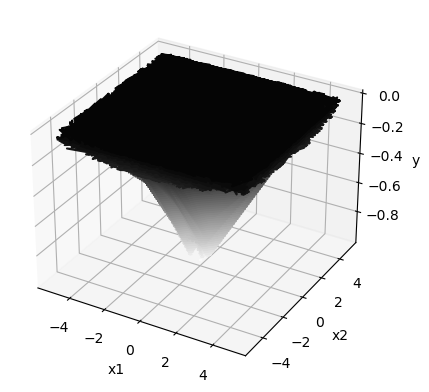

In [4]:
#drop-wave function using tinygp

#Drop-wave function description
random = np.random.default_rng()
X = random.uniform(-5.12, 5.12, (100, 2))
yerr = 0.01
y = -(1+np.cos(12*np.sqrt(X[:, 0]**2+X[:, 1]**2)))/(0.5*(X[:, 0]**2+X[:, 1]**2)+2) + yerr * random.normal(
    size=len(X))

#Plotting drop-wave function
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
X1,X2 = np.meshgrid(X[:,0], X[:,1])
y_true = -(1+np.cos(12*np.sqrt(X1**2+X2**2)))/(0.5*(X1**2+X2**2)+2)
X_pred = np.vstack((X1.flatten(), X2.flatten())).T

ax.contour3D(X1, X2, y_true, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

#Training data
def train_gp(nparams, build_gp_func):
    @jax.jit
    def loss(params):
        return -build_gp_func(params).log_probability(y)

    params = {
        "log_amp": np.float64(0.0),
        "log_scale": np.zeros(nparams),
    }
    solver = jaxopt.ScipyMinimize(fun=loss)
    soln = solver.run(params)
    return build_gp_func(soln.params)

#Kernel = Exponential squared, uncorrelated 
def build_gp_uncorr(params):
    kernel = jnp.exp(params["log_amp"]) * transforms.Linear(
        jnp.exp(-params["log_scale"]), kernels.ExpSquared()
    )
    return GaussianProcess(kernel, X, diag=yerr**2)

uncorr_gp = train_gp(2, build_gp_uncorr)

y_pred = uncorr_gp.condition(y, X_pred).gp.loc.reshape(y_true.shape)

#printing results, comparing trained(predicted) data vs. true value
print(f"Predicted minimum y value using GP: {y_pred.min()}")

print(f"Minimum y value from sampled points: {y_true.min()}")

Predicted y value: 0.00015362154132972982
Actual y value: 8.07804298630228


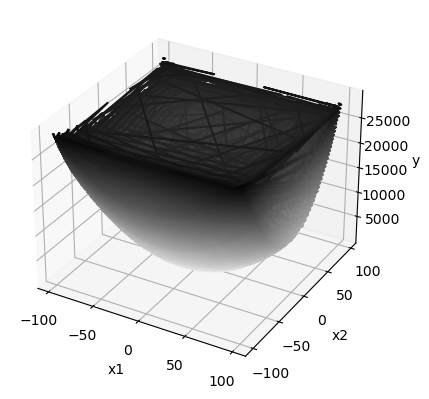

In [9]:
#BOHACHEVSKY FUNCTIONS using tinygp

#BOHACHEVSKY FUNCTIONS description
random = np.random.default_rng()
X = random.uniform(-100, 100, (100, 2))
yerr = 0.01
y = X[:,0]**2 + 2*X[:,1]**2 - 0.3*np.cos(3*np.pi*X[:,0]) - 0.4*np.cos(4*np.pi*X[:,1]) + 0.7 + yerr * random.normal(
    size=len(X))

#Plotting BOHACHEVSKY FUNCTIONS
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
X1,X2 = np.meshgrid(X[:,0], X[:,1])
y_true = X1**2 + 2*X2**2 - 0.3*np.cos(3*np.pi*X1) - 0.4*np.cos(4*np.pi*X2) +0.7
X_pred = np.vstack((X1.flatten(), X2.flatten())).T

ax.contour3D(X1, X2, y_true, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

#Training data
def train_gp(nparams, build_gp_func):
    @jax.jit
    def loss(params):
        return -build_gp_func(params).log_probability(y)

    params = {
        "log_amp": np.float64(0.0),
        "log_scale": np.zeros(nparams),
    }
    solver = jaxopt.ScipyMinimize(fun=loss)
    soln = solver.run(params)
    return build_gp_func(soln.params)

#Kernel = Exponential squared, uncorrelated 
def build_gp_uncorr(params):
    kernel = jnp.exp(params["log_amp"]) * transforms.Linear(
        jnp.exp(-params["log_scale"]), kernels.ExpSquared()
    )
    return GaussianProcess(kernel, X, diag=yerr**2)

uncorr_gp = train_gp(2, build_gp_uncorr)

y_pred = uncorr_gp.condition(y, X_pred).gp.loc.reshape(y_true.shape)

#printing results, comparing trained(predicted) data vs. true value
print(f"Predicted minimum y value using GP: {y_pred.min()}")

print(f"Minimum y value from sampled points: {y_true.min()}")